In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Read monthly trade data
df = pd.read_csv('../data/processed/monthly_TradeData.csv')

In [5]:
# Convert the integer column to datetime format
df['Period'] = pd.to_datetime(df['Period'], format='%Y%m')

# Convert the datetime format to the desired string format
df['Period'] = df['Period'].dt.strftime('%YM%m')

In [6]:
df

,Period,ReporterISO,ReporterDesc,PartnerISO,PartnerDesc,PrimaryValue
0,2001M01,NOR,Norway,FIN,Finland,1.087262e+06
1,2001M01,CHE,Switzerland,FIN,Finland,9.427225e+05
2,2001M01,FRA,France,THA,Thailand,7.555251e+06
3,2001M01,ITA,Italy,THA,Thailand,6.064291e+04
4,2001M01,CHE,Switzerland,THA,Thailand,7.525743e+05
...,...,...,...,...,...,...
556954,2018M12,USA,USA,EGY,Egypt,4.511700e+04
556955,2018M12,USA,USA,GBR,United Kingdom,2.113411e+07
556956,2018M12,USA,USA,URY,Uruguay,6.927050e+05
556957,2018M12,USA,USA,VEN,Venezuela,2.183130e+05


### Baseline

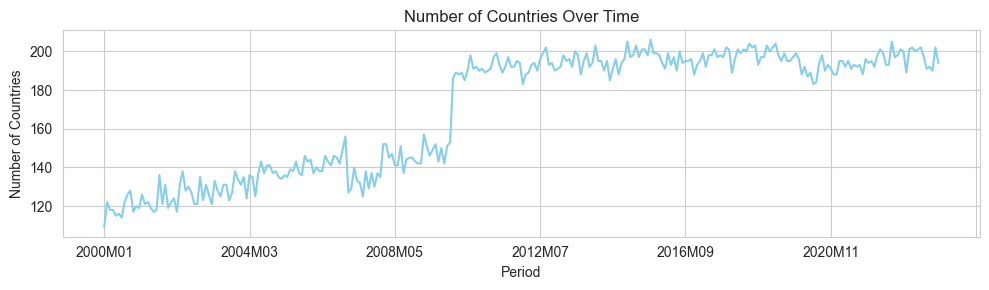

In [7]:

# Group by 'Period' and count the unique countries for each period
country_counts_by_period_0 = df.groupby('Period')[['ReporterDesc', 'PartnerDesc']].apply(lambda x: len(set(x['ReporterDesc']).union(set(x['PartnerDesc']))))

plt.figure(figsize=(10, 3))
# Plotting
country_counts_by_period_0.plot(color='skyblue', linestyle='-')
plt.title('Number of Countries Over Time')
plt.xlabel('Period')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()


In [8]:
country_counts_by_period_0

Period
2000M01    109
2000M02    122
2000M03    118
2000M04    118
2000M05    115
          ... 
2023M08    191
2023M09    192
2023M10    190
2023M11    202
2023M12    194
Length: 288, dtype: int64

In [9]:
# Filter the data
df_period1 = df[(df['Period'] <= '2009M12')]
df_period2 = df[(df['Period'] >= '2010M01')]


In [10]:
# Concatenate unique country names from both 'ReporterDesc' and 'PartnerDesc' columns for each percentile
unique_countries_period1 = set(pd.concat([df_period1['ReporterDesc'], df_period1['PartnerDesc']]).unique())
unique_countries_period2 = set(pd.concat([df_period2['ReporterDesc'], df_period2['PartnerDesc']]).unique())

# Find the set differences between the unique countries in two periods
countries_removed = unique_countries_period1 - unique_countries_period2
countries_added = unique_countries_period2 - unique_countries_period1

# Display the results
print("Countries Added from period1 to period2:")
print(countries_added)
print("Countries Removed from period1 to period2:")
print(countries_removed)

Countries Added from period1 to period2:
{'Palau', 'FS Micronesia', 'Sudan', 'Sint Maarten', 'Kiribati', 'Norfolk Isds', 'N. Mariana Isds', 'Antarctica', 'Niue', 'American Samoa', 'Curaçao', 'Montserrat', 'Bonaire', 'South Sudan', 'Western Sahara', 'Bouvet Island', 'Tonga', 'Timor-Leste', 'Heard Island and McDonald Islands', 'Nauru', 'Saint Barthélemy', 'Br. Indian Ocean Terr.'}
Countries Removed from period1 to period2:
{'Serbia and Montenegro (...2005)'}


### Remove small Primary values by percentile

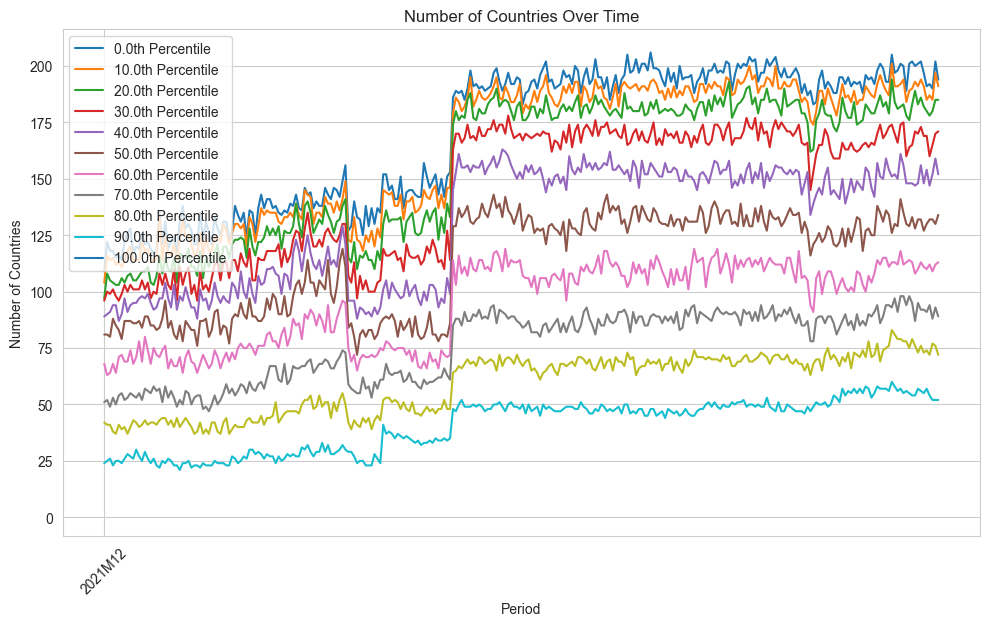

Variance for 0.0th Percentile: 963.87
Variance for 10.0th Percentile: 926.28
Variance for 20.0th Percentile: 952.21
Variance for 30.0th Percentile: 854.65
Variance for 40.0th Percentile: 687.82
Variance for 50.0th Percentile: 491.25
Variance for 60.0th Percentile: 336.44
Variance for 70.0th Percentile: 235.59
Variance for 80.0th Percentile: 174.24
Variance for 90.0th Percentile: 133.34
Variance for 100.0th Percentile: nan


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns 'ReporterDesc', 'PartnerDesc', 'Period', and 'PrimaryValue'

# Define the range of percentile thresholds
percentile_range = [i / 10 for i in range(0, 11)]  # Range from 0 to 1 by 0.1 increments

plt.figure(figsize=(10, 6))

labels = []  # List to store labels
variances = []  # List to store variances

for percentile_threshold in percentile_range:
    # Calculate the percentile threshold value
    value_threshold = df['PrimaryValue'].quantile(percentile_threshold)
    
    # Filter out rows with 'PrimaryValue' below the threshold
    df_filtered = df[df['PrimaryValue'] >= value_threshold]
    
    # Group by 'Period' and count the unique countries for each period
    country_counts_by_period = df_filtered.groupby('Period')[['ReporterDesc', 'PartnerDesc']].apply(
        lambda x: len(set(x['ReporterDesc']).union(set(x['PartnerDesc']))))
    
    # Calculate variance of the country counts
    variance = country_counts_by_period.var()
    variances.append(variance)
    
    # Plotting
    country_counts_by_period.plot(label=f'{percentile_threshold * 100:.1f}th Percentile')
    labels.append(f'{percentile_threshold * 100:.1f}th Percentile')  # Append label to the list

# Plotting
plt.title('Number of Countries Over Time')
plt.xlabel('Period')
plt.ylabel('Number of Countries')
plt.tight_layout()

# Set the x-ticks positions at every 24th period
period_ticks = range(0, len(country_counts_by_period.index), 24)
period_labels = [country_counts_by_period.index[i] for i in period_ticks]

plt.xticks(period_ticks, period_labels, rotation=45)  # Rotate x-labels for better readability
plt.legend(labels)  # Display labels
plt.show()

# Display variance for each percentile
for percentile, variance in zip(percentile_range, variances):
    print(f'Variance for {percentile * 100:.1f}th Percentile: {variance:.2f}')


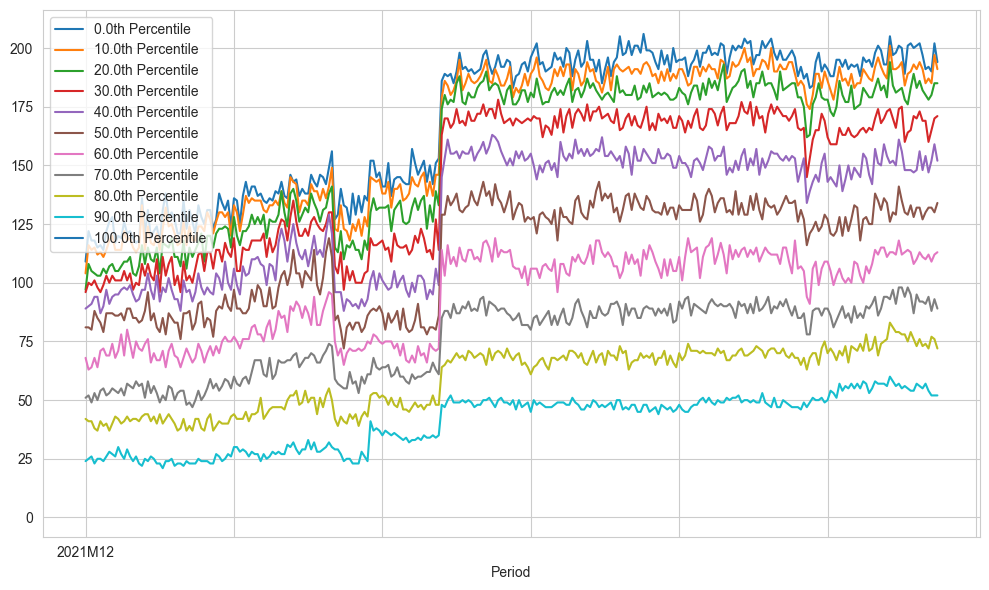

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns 'ReporterDesc', 'PartnerDesc', 'Period', and 'PrimaryValue'

# Define the range of percentile thresholds
percentile_range = [i / 10 for i in range(0, 11)]  # Range from 0 to 1 by 0.1 increments

plt.figure(figsize=(10, 6))

labels = []  # List to store labels

for percentile_threshold in percentile_range:
    # Calculate the percentile threshold value
    value_threshold = df['PrimaryValue'].quantile(percentile_threshold)
    
    # Filter out rows with 'PrimaryValue' below the threshold
    df_filtered = df[df['PrimaryValue'] >= value_threshold]
    
    # Concatenate unique country names from both 'ReporterDesc' and 'PartnerDesc' columns
    unique_countries = pd.concat([df_filtered['ReporterDesc'], df_filtered['PartnerDesc']]).unique()
    
    # Group by 'Period' and count the unique countries for each period
    country_counts_by_period = df_filtered.groupby('Period')[['ReporterDesc', 'PartnerDesc']].apply(lambda x: len(set(x['ReporterDesc']).union(set(x['PartnerDesc']))))
    
    # Plotting
    country_counts_by_period.plot(label=f'{percentile_threshold * 100:.1f}th Percentile')
    labels.append(f'{percentile_threshold * 100:.1f}th Percentile')  # Append label to the list

# Plotting
#ax = country_counts_by_period.plot(color='skyblue', linestyle='-')
#plt.title('Number of Countries Over Time')
#plt.xlabel('Period')
#plt.ylabel('Number of Countries')
plt.tight_layout()

# Set the x-ticks positions
#period_ticks = range(0, len(country_counts_by_period.index), 24)
# Set the corresponding labels
#period_labels = country_counts_by_period.index[period_ticks]

# Set the x-ticks and labels
#ax.set_xticks(period_ticks)
#ax.set_xticklabels(period_labels, rotation=45)  # Rotate x-labels for better readability

plt.legend(labels)  # Display labels
plt.show()



### Remove outliers by level of primary value percetile removed

In [13]:
# Assuming 'df' is your DataFrame with columns 'ReporterDesc', 'PartnerDesc', 'Period', and 'PrimaryValue'

# Define the percentile thresholds
percentile_threshold_1 = 0
percentile_threshold_2 = 0.6

# Calculate the percentile threshold values
value_threshold_1 = df['PrimaryValue'].quantile(percentile_threshold_1)
value_threshold_2 = df['PrimaryValue'].quantile(percentile_threshold_2)

# Filter out rows with 'PrimaryValue' below each threshold
df_filtered_1 = df[df['PrimaryValue'] >= value_threshold_1]
df_filtered_2 = df[df['PrimaryValue'] >= value_threshold_2]

# Concatenate unique country names from both 'ReporterDesc' and 'PartnerDesc' columns for each percentile
unique_countries_1 = set(pd.concat([df_filtered_1['ReporterDesc'], df_filtered_1['PartnerDesc']]).unique())
unique_countries_2 = set(pd.concat([df_filtered_2['ReporterDesc'], df_filtered_2['PartnerDesc']]).unique())

# Find the set differences between the unique countries in each percentile
countries_removed = unique_countries_1 - unique_countries_2
countries_added = unique_countries_2 - unique_countries_1

# Display the results
print("Countries Removed between", percentile_threshold_1, "and", percentile_threshold_2, ":")
print(countries_removed)
print("Countries Added between", percentile_threshold_1, "and", percentile_threshold_2, ":")
print(countries_added)

Countries Removed between 0 and 0.6 :
{'Guinea-Bissau', 'Saint Pierre and Miquelon', 'Palau', 'Holy See (Vatican City State)', 'Niue', 'South Georgia and the South Sandwich Islands', 'Lesotho', 'Saint Barthélemy', 'Saint Helena', 'Sao Tome and Principe', 'Falkland Isds (Malvinas)', 'Wallis and Futuna Isds', 'Montserrat', 'Fr. South Antarctic Terr.', 'Pitcairn', 'Marshall Isds', 'N. Mariana Isds', 'Antarctica'}
Countries Added between 0 and 0.6 :
set()


In [14]:
percentile_threshold = 0.6

value_threshold = df['PrimaryValue'].quantile(percentile_threshold)
    
# Filter out rows with 'PrimaryValue' below the threshold
df_remove60 = df[df['PrimaryValue'] >= value_threshold]


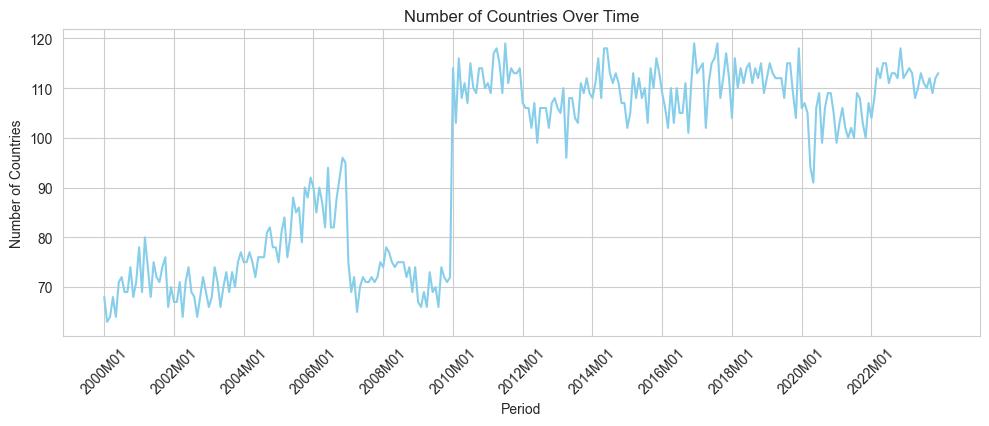

In [15]:
# Assuming 'df' is your DataFrame with columns 'ReporterDesc', 'PartnerDesc', 'Period', and 'PrimaryValue'

# Concatenate unique country names from both 'ReporterDesc' and 'PartnerDesc' columns
unique_countries_remove60 = pd.concat([df_remove60['ReporterDesc'], df_remove60['PartnerDesc']]).unique()

# Group by 'Period' and count the unique countries for each period
unique_countries_remove60_by_period_0 = df_remove60.groupby('Period')[['ReporterDesc', 'PartnerDesc']].apply(lambda x: len(set(x['ReporterDesc']).union(set(x['PartnerDesc']))))

plt.figure(figsize=(10, 4))

# Plotting
ax = unique_countries_remove60_by_period_0.plot(color='skyblue', linestyle='-')
plt.title('Number of Countries Over Time')
plt.xlabel('Period')
plt.ylabel('Number of Countries')
plt.tight_layout()

# Set the x-ticks positions
period_ticks = range(0, len(unique_countries_remove60_by_period_0.index), 24)
# Set the corresponding labels
period_labels = unique_countries_remove60_by_period_0.index[period_ticks]

# Set the x-ticks and labels
ax.set_xticks(period_ticks)
ax.set_xticklabels(period_labels, rotation=45)  # Rotate x-labels for better readability

plt.show()


explore what happened in 2007-2010 -- great recession

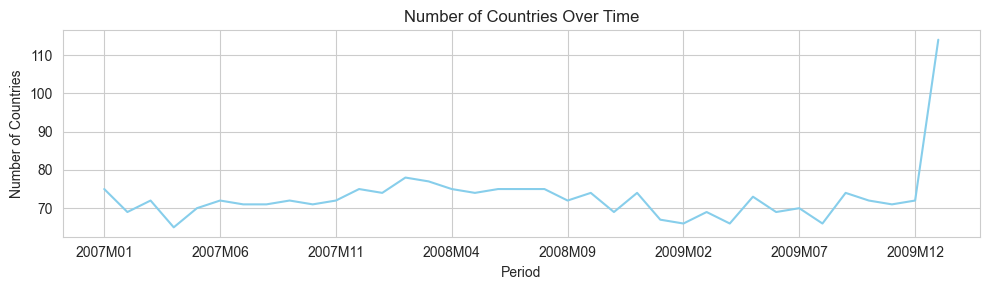

In [16]:
df_period3 = df_remove60[(df_remove60['Period'] <= '2010M01')&(df_remove60['Period'] >= '2007M01')]

# Group by 'Period' and count the unique countries for each period
country_counts_by_period_3 = df_period3.groupby('Period')[['ReporterDesc', 'PartnerDesc']].apply(lambda x: len(set(x['ReporterDesc']).union(set(x['PartnerDesc']))))

plt.figure(figsize=(10, 3))
# Plotting
country_counts_by_period_3.plot(color='skyblue', linestyle='-')
plt.title('Number of Countries Over Time')
plt.xlabel('Period')
plt.ylabel('Number of Countries')
plt.tight_layout()

# Set the x-ticks positions
period_ticks = range(0, len(country_counts_by_period_3.index), 12)
# Set the corresponding labels
period_labels = country_counts_by_period_3.index[period_ticks]

# Set the x-ticks and labels
ax.set_xticks(period_ticks)
ax.set_xticklabels(period_labels, rotation=45)  # Rotate x-labels for better readability

plt.show()


In [17]:

# Filter the data
df_remove60_period1 = df_remove60[(df_remove60['Period'] < '2009M12')]
# df_remove60_period2 = df_remove60[(df_remove60['Period'] < '2010M01')&(df_remove60['Period'] >= '2007M01')]
df_remove60_period2 = df_remove60[(df_remove60['Period'] == '2009M12')]
df_remove60_period3 = df_remove60[(df_remove60['Period'] == '2010M01')]

# Concatenate unique country names from both 'ReporterDesc' and 'PartnerDesc' columns for each percentile
unique_countries_remove60_period1 = set(pd.concat([df_remove60_period1['ReporterDesc'], df_remove60_period1['PartnerDesc']]).unique())
unique_countries_remove60_period2 = set(pd.concat([df_remove60_period2['ReporterDesc'], df_remove60_period2['PartnerDesc']]).unique())
unique_countries_remove60_period3 = set(pd.concat([df_remove60_period3['ReporterDesc'], df_remove60_period3['PartnerDesc']]).unique())

print(len(unique_countries_remove60_period1), len(unique_countries_remove60_period2),len(unique_countries_remove60_period3))

162 72 114


In [18]:

# Find the set differences between the unique countries in two periods
countries12_added = unique_countries_remove60_period2 - unique_countries_remove60_period1
countries12_removed = unique_countries_remove60_period1 - unique_countries_remove60_period2

# Display the results
print("Countries Added from Period 2 to Period 1:")
print(countries12_added,'\n')
print("Countries Removed from Period 1 to Period 2:")
print(countries12_removed)


Countries Added from Period 2 to Period 1:
set() 

Countries Removed from Period 1 to Period 2:
{'Mali', 'Belize', 'Iraq', 'San Marino', 'Djibouti', 'Liberia', 'United States Minor Outlying Islands', 'Georgia', 'Kazakhstan', 'Qatar', 'Mongolia', 'Angola', 'Ghana', 'Niger', "Côte d'Ivoire", 'Bangladesh', 'Jordan', "Dem. People's Rep. of Korea", 'New Caledonia', 'Benin', 'Chad', 'Namibia', 'Kyrgyzstan', 'State of Palestine', 'Rwanda', 'Togo', 'Pakistan', 'United Rep. of Tanzania', 'Botswana', 'Serbia and Montenegro (...2005)', 'Nicaragua', 'Syria', 'Gibraltar', 'Greenland', 'Bahrain', 'Congo', 'Senegal', 'Armenia', 'El Salvador', 'Faeroe Isds', 'Afghanistan', 'Dem. Rep. of the Congo', 'Cameroon', 'Montenegro', 'Ecuador', 'Colombia', 'Bosnia Herzegovina', 'New Zealand', 'Barbados', 'Venezuela', 'French Polynesia', 'Iceland', 'Azerbaijan', 'Peru', 'Eswatini', 'Ethiopia', 'Guatemala', 'Kenya', 'Uganda', 'Seychelles', 'Sierra Leone', 'Madagascar', 'Netherlands Antilles (...2010)', 'Mayotte (

In [19]:
# Find the set differences between the unique countries in two periods
countries13_added = unique_countries_remove60_period3 - unique_countries_remove60_period1
countries13_removed = unique_countries_remove60_period1 - unique_countries_remove60_period3

# Display the results
print("Countries Added from Period 3 to Period 1:")
print(countries13_added,'\n')
print("Countries Removed from Period 3 to Period 1:")
print(countries13_removed)

Countries Added from Period 3 to Period 1:
{'Trinidad and Tobago', 'Bouvet Island', 'Turks and Caicos Isds', 'Papua New Guinea', 'Jamaica'} 

Countries Removed from Period 3 to Period 1:
{'Madagascar', 'Mali', 'Mayotte (Overseas France)', 'Dem. Rep. of the Congo', 'Belize', 'Sierra Leone', "Dem. People's Rep. of Korea", 'Iraq', 'New Caledonia', 'Montenegro', 'Gabon', 'Djibouti', 'Benin', 'Liberia', 'Mauritius', 'Chad', 'United States Minor Outlying Islands', 'Bosnia Herzegovina', 'Kyrgyzstan', 'Honduras', 'Maldives', 'Brunei Darussalam', 'Zimbabwe', 'Rwanda', 'Barbados', 'Guinea', 'Togo', 'French Polynesia', 'Equatorial Guinea', 'Senegal', 'Comoros', 'Botswana', 'Qatar', 'Mongolia', 'Uzbekistan', 'Oman', 'Serbia and Montenegro (...2005)', 'Eswatini', 'Br. Virgin Isds', 'Mauritania', 'Ethiopia', 'Niger', 'Gibraltar', 'Burkina Faso', 'Kenya', 'Yemen', 'Uganda', 'Sudan (...2011)', "Côte d'Ivoire", 'Seychelles', 'Jordan', 'Congo', 'Zambia'}


In [20]:
{'Cambodia', 'Saint Lucia', 'Dominica', 'Somalia', 'Saint Kitts and Nevis', 'Malawi', 'Bhutan', 'Cook Isds', 'Turkmenistan', 'Tajikistan', 'Jamaica', '', '', 'FS Micronesia', 'Djibouti', 'Antigua and Barbuda', 'Cabo Verde', 'Tuvalu', 'Curaçao', 'Maldives', 'Saint Vincent and the Grenadines', 'South Sudan', 'Gambia', 'Aruba', 'Myanmar', 'Bahamas', 'Sint Maarten', "Lao People's Dem. Rep.", '', 'Guyana', 'Fiji', 'San Marino', 'Haiti', 'Samoa', 'Timor-Leste', 'Nepal', 'Tonga', '', 'Trinidad and Tobago', 'Suriname', 'Vanuatu', 'Sudan', 'Central African Rep.', 'Papua New Guinea', 'Eritrea', 'Grenada', 'Nauru', 'Solomon Isds', 'Kiribati'} 

{'Maldives', 'Montenegro', 'State of Palestine', 'Chad', 'Mongolia', 'San Marino', 'Djibouti'}

{'Chad',
 'Djibouti',
 'Maldives',
 'Mongolia',
 'Montenegro',
 'San Marino',
 'State of Palestine'}

In [21]:
# Find the set differences between the unique countries in two periods
countries23_added = unique_countries_remove60_period3 - unique_countries_remove60_period2
countries23_removed = unique_countries_remove60_period2 - unique_countries_remove60_period3

# Display the results
print("Countries Added from Period 3 to Period 2:")
print(countries23_added,'\n')
print("Countries Removed from Period 3 to Period 2:")
print(countries23_removed)

Countries Added from Period 3 to Period 2:
{'Armenia', 'Netherlands Antilles (...2010)', 'Faeroe Isds', 'Trinidad and Tobago', 'Afghanistan', 'Cameroon', 'San Marino', 'Libya', 'Ecuador', 'Uruguay', 'Colombia', 'Dominican Rep.', 'Namibia', 'Georgia', 'Turks and Caicos Isds', 'New Zealand', 'Papua New Guinea', 'Mozambique', 'State of Palestine', 'Venezuela', 'Jamaica', 'China, Macao SAR', 'Kazakhstan', 'Lebanon', 'Pakistan', 'United Rep. of Tanzania', 'Iceland', 'Bouvet Island', 'Azerbaijan', 'Angola', 'Bolivia (Plurinational State of)', 'Paraguay', 'Peru', 'Nicaragua', 'Ghana', 'Syria', 'Guatemala', 'Greenland', 'Chile', 'Bangladesh', 'Bahrain', 'El Salvador'} 

Countries Removed from Period 3 to Period 2:
set()


In [22]:
unique_countries_remove60_period1

{'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bolivia (Plurinational State of)',
 'Bosnia Herzegovina',
 'Botswana',
 'Br. Virgin Isds',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Cameroon',
 'Canada',
 'Chad',
 'Chile',
 'China',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 "Dem. People's Rep. of Korea",
 'Dem. Rep. of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Rep.',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faeroe Isds',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Guatemala',
 'Guinea',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 '